In [ ]:
# Gradient Descent for Neural Network (Logistic Regression)

This notebook demonstrates predicting whether a person would buy life insurance based on their age and affordability.

- Binary classification problem: 1 → buys insurance, 0 → does not buy.
- Using TensorFlow 2.0, Keras, Python, and supporting libraries.
- Includes gradient descent optimization and logistic regression.

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import log_loss
%matplotlib inline

In [ ]:
## Dataset

- Load the insurance dataset `insurance_data.csv`.
- The dataset has columns: age, affordability, bought_insurance.

In [7]:
df = pd.read_csv("/home/muhammad/Desktop/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
## Data Preprocessing

- Split dataset into features (`age`, `affordibility`) and target (`bought_insurance`).
- Split into training and test sets.
- Scale `age` feature for better model performance.
- Use a small subset for training to avoid freezing in GitHub preview.

In [8]:
# Features and target
X = df[['age', 'affordibility']]
y = df['bought_insurance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Scale age
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

# Small subset for GitHub preview
X_train_small = X_train_scaled[:20]
y_train_small = y_train[:20]
X_test_small = X_test_scaled[:10]
y_test_small = y_test[:10]

In [ ]:
## Model Definition

- Simple neural network (logistic regression) with one output neuron and sigmoid activation.
- Compile with Adam optimizer and binary crossentropy loss.

In [9]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/home/muhammad/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Model Training

- Train on a small subset to prevent freezing in GitHub preview.
- Display training logs for few epochs.

In [10]:
history = model.fit(
    X_train_small, y_train_small,
    epochs=5,
    batch_size=4,
    verbose=1
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3833 - loss: 0.7974  
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 0.7874     
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3806 - loss: 0.7279 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3910 - loss: 0.7222 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3076 - loss: 0.7431


In [ ]:
## Model Predictions

- Predict probabilities for the test subset.
- Values closer to 1 → likely to buy insurance, closer to 0 → unlikely.

In [11]:
predictions = model.predict(X_test_small)
print("Predictions (small subset):", predictions)

# Convert to class 0 or 1
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted Classes:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predictions (small subset): [[0.47879872]
 [0.56682545]
 [0.44310936]
 [0.53666466]
 [0.4727137 ]
 [0.43643585]]
Predicted Classes: [[0]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
## Training Metrics

- Plot loss and accuracy to visualize training progress.

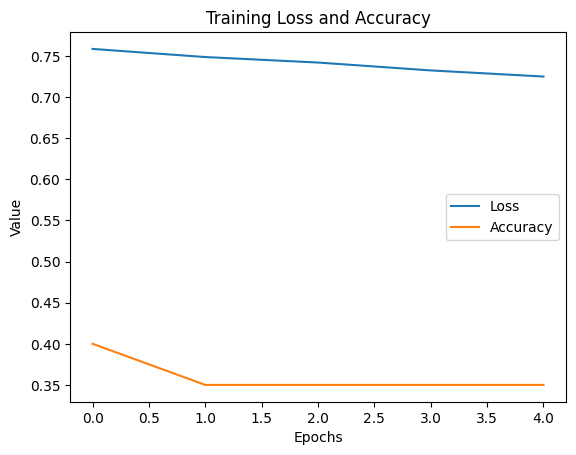

In [12]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

In [13]:
class MyNN:
    def __init__(self):
        self.w1 = 1.0
        self.w2 = 1.0
        self.bias = 0.0

    def sigmoid_numpy(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, epochs=1500, loss_threshold=0.4631):
        """Train the model using gradient descent."""
        self.w1, self.w2, self.bias = self.gradient_descent(
            X['age'], X['affordibility'], y, epochs, loss_threshold
        )
        print(f"Final weights and bias: w1={self.w1:.4f}, w2={self.w2:.4f}, bias={self.bias:.4f}")

    def gradient_descent(self, age, affordability, y_true, epochs, loss_threshold):
        """Gradient descent algorithm to update weights and bias."""
        age = np.array(age)
        affordability = np.array(affordability)
        y_true = np.array(y_true)

        w1, w2, bias = self.w1, self.w2, self.bias
        rate = 0.5
        n = len(age)

        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = self.sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n) * np.dot(age.T, (y_predicted - y_true))
            w2d = (1/n) * np.dot(affordability.T, (y_predicted - y_true))
            bias_d = np.mean(y_predicted - y_true)

            w1 -= rate * w1d
            w2 -= rate * w2d
            bias -= rate * bias_d

            if i % 100 == 0:
                print(f"Epoch {i}, w1={w1:.4f}, w2={w2:.4f}, bias={bias:.4f}, loss={loss:.4f}")

            if loss <= loss_threshold:
                print(f"Stopping early at epoch {i}, loss={loss:.4f}")
                break

        return w1, w2, bias

    def predict(self, age, affordability):
        """Predict probability for a single sample."""
        weighted_sum = self.w1 * age + self.w2 * affordability + self.bias
        return self.sigmoid_numpy(weighted_sum)

    def predict_batch(self, X):
        """Predict probabilities for a DataFrame."""
        weighted_sum = self.w1 * X['age'] + self.w2 * X['affordibility'] + self.bias
        return self.sigmoid_numpy(weighted_sum)

In [14]:
# Limit dataset to first 4000 samples
df_small = df.iloc[:4000]

# Split features and target
X = df_small[['age', 'affordibility']]
y = df_small['bought_insurance']

# Scale features
X_scaled = X.copy()
X_scaled['age'] = X_scaled['age'] / 100
X_scaled['affordibility'] = X_scaled['affordibility'] / X_scaled['affordibility'].max()

# Split train/test
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=25
)

In [ ]:
## Custom Neural Network Class

- `MyNN` class defines a simple neural network with two input features.
- Uses **sigmoid activation** function.
- Implements **gradient descent** manually to update weights and bias.
- Supports:
  - Training via `.fit()`
  - Predicting single samples via `.predict()`
  - Predicting batches of samples via `.predict_batch()`

In [17]:
# Create and train model
customModel = MyNN()
customModel.fit(X_train_scaled, y_train, epochs=1500, loss_threshold=0.4631)

Epoch 0, w1=0.9749, w2=0.9483, bias=-0.1134, loss=0.7113
Epoch 100, w1=2.2007, w2=1.2942, bias=-1.6607, loss=0.5391
Epoch 200, w1=3.4430, w2=1.4042, bias=-2.2571, loss=0.5005
Epoch 300, w1=4.4722, w2=1.4388, bias=-2.7074, loss=0.4751
Stopping early at epoch 366, loss=0.4629
Final weights and bias: w1=5.0510, w2=1.4570, bias=-2.9597


In [19]:
# Single prediction example
single_pred = customModel.predict(0.47, 1)
print("Single prediction:", single_pred)

# Batch prediction on test set
batch_preds = customModel.predict_batch(X_test_scaled)
print("First 5 predictions:", batch_preds[:5])


Single prediction: 0.7050199520774729
First 5 predictions: 2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
dtype: float64


In [20]:
print("Weights (coef):", customModel.w1, customModel.w2)
print("Bias (intercept):", customModel.bias)


Weights (coef): 5.051047623653049 1.4569794548473887
Bias (intercept): -2.959653454625004
